In [8]:
import matplotlib.pyplot as plt

### K-Means Review

The $k$-means algorithm finds $k$ clusters in a dataset

 * The "cluster center" is the arithmetic mean of all the points that belong to that cluster.
 * Each point is closer to its own cluster center than to other cluster centers.


### Machine Learning for Scikit Learn 

* Scikit-Learn is an open-source library for machine learning algorithms in Python

* Numerous packages targeted for niche scientific domains

* Some popular Scikits:
  - `scikit-gstat`: Geostatistical expansion in the SciPy style
  - `scikit-image`: Image processing routines for SciPy
  - `scikit-sound`: Python utilities for working with sound signals
  - `scikit-xray`: Data analysis tools for X-ray science

Scikits-Learn has a consistent API making it easy to learn, use, explore and contribute to

### Scikit-Learn Modules

* A dizzying amount of functionality

* Many packages for accessing/generating data, processing data, model building, training, and validation, etc.
  * Functionality organized logically.
    Ex. `scklearn.datasets`, `sklearn.clustering`, `sklearn.regression` etc.

<img src="https://www.dropbox.com/s/6sok6xeyjxb7c4w/scikit.png?dl=1" alt="drawing" style="width:500px;"/>

[Scikit Clustering Page](https://scikit-learn.org/stable/modules/clustering.html)

In [15]:
from sklearn.datasets import make_blobs


X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

print("The data:")
print(X[:4])
print ("\nThe labels:")
print(y_true[:10])

The data:
[[ 0.83685684  2.13635938]
 [-1.4136581   7.40962324]
 [ 1.15521298  5.09961887]
 [-1.01861632  7.81491465]]

The labels:
[1 3 0 3 1 1 2 0 3 3]


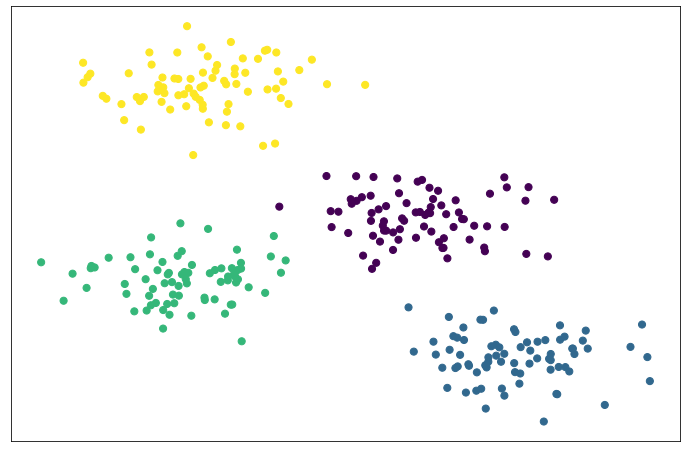

In [16]:
plt.figure(figsize=(12, 8))

plt.scatter(X[:, 0], X[:, 1], s=50, c=y_true);

_ = plt.xticks([], [])
_ = plt.yticks([], [])

### Using Scikit-Learn

* Using `sklearn` cluster to assign data to the clusters
  * We have y since we generated the data. 
  * `sklearn` will be used instead of `y`, and it will attempt to guess the `y` value

* We know that $k=4$

* Scikit takes $k$ and attempts to fit the model to the data
  * Find the assignment `y' that satisfies the `SSE`


In [20]:
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

y_predicted = kmeans.predict(X)


CPU times: user 50.3 ms, sys: 4.78 ms, total: 55.1 ms
Wall time: 30.5 ms


In [21]:
y_predicted[:10]

array([2, 1, 0, 1, 2, 2, 3, 0, 1, 1], dtype=int32)

([], [])

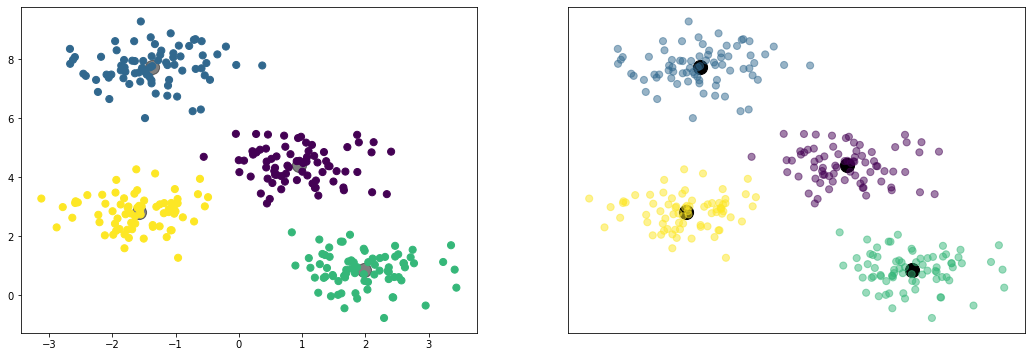

In [24]:
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_predicted);


plt.subplot(1,2,2)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1);
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_predicted, alpha=0.5);

plt.xticks([], [])
plt.yticks([], [])



### Using Silhouette to Identify the Number of Clusters

* Recall that $k-$means uses whatever number of clusters you instruct it to use
  * The data and $k$ are inputs to the algorithm


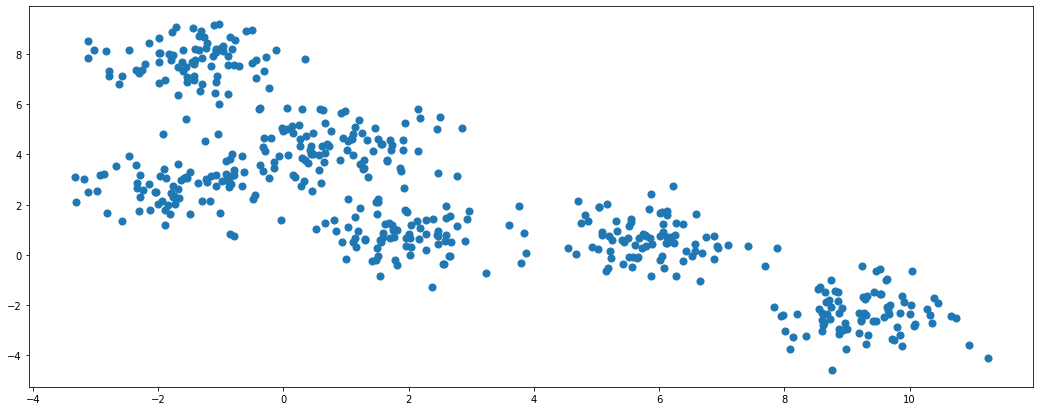

In [26]:
from sklearn.datasets import make_blobs


X, y_true = make_blobs(n_samples=500, centers=6,
                       cluster_std=0.79, random_state=0)

plt.figure(figsize=(18, 7))

y_predicted_k_6 = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=50);

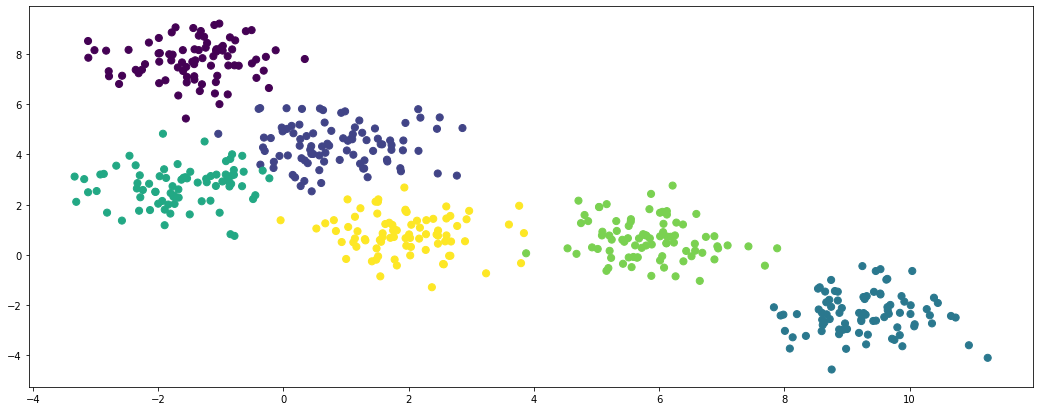

In [27]:
plt.figure(figsize=(18, 7))

plt.scatter(X[:, 0], X[:, 1], c=y_predicted_k_6, s=50);

In [30]:
from sklearn.metrics import silhouette_score

y_predicted_k_6 = KMeans(6, random_state=0).fit_predict(X)

y_predicted_k_6[0:20]

array([2, 5, 0, 4, 0, 3, 3, 1, 5, 3, 2, 0, 1, 3, 1, 1, 2, 2, 5, 3],
      dtype=int32)

In [31]:
silhouette_score(X, y_predicted_k_6)

0.5984033129926831

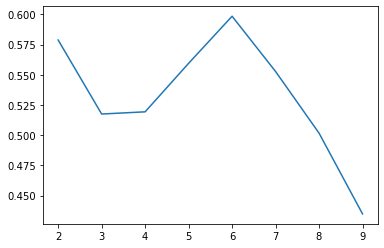

In [32]:
silhouette_scores = []

for i in range(2, 10):
    y_predicted = KMeans(i, random_state=0).fit_predict(X)
    s_i = silhouette_score(X, y_predicted)
    silhouette_scores.append(s_i)

plt.plot(range(2, 10), silhouette_scores)

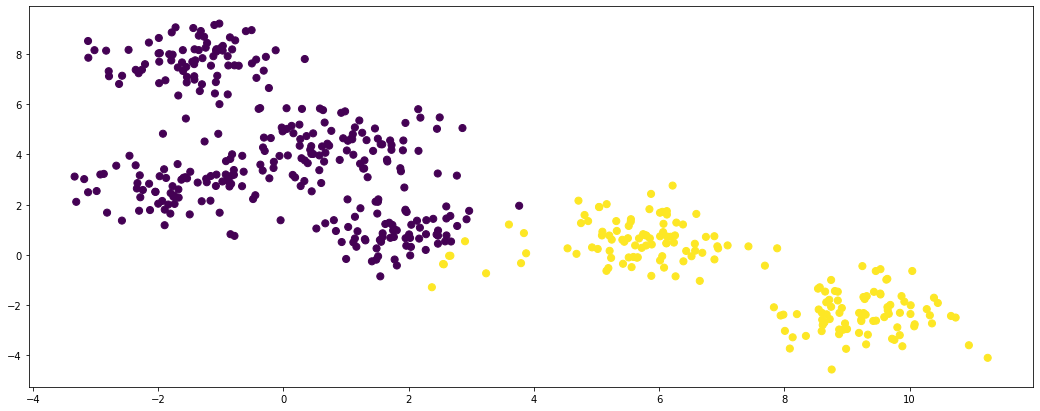

In [33]:
plt.figure(figsize=(18, 7))
y_predicted = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_predicted, s=50);

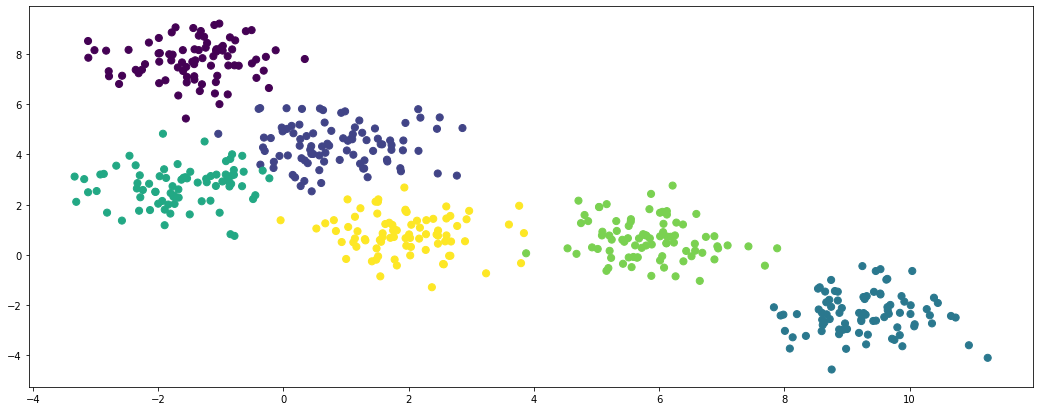

In [34]:
plt.figure(figsize=(18, 7))
y_predicted = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_predicted, s=50);

### K-Means on Digits

* We will attempt to $k$-means to identify the number of digits  in the digits dataset (MNIST)

  * Made up of 1797, 8x8 images
  * Each image represents a handwritten digit
    * Comes form American Census Bureau employees and American high school students
  * Each dimension is a gray-scale intensity (0-16)

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [36]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

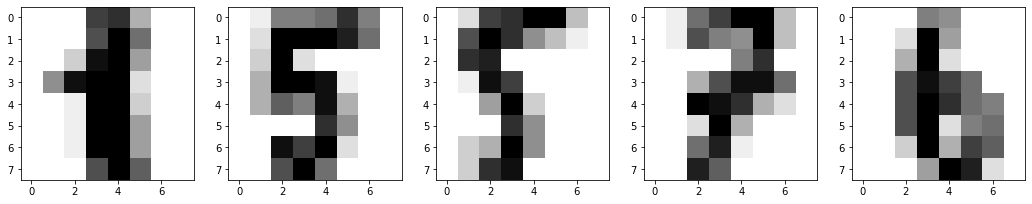

In [37]:
plt.figure(figsize=(18, 7))

plt_index = 1
for i in range(1,digits.data.shape[0],400):
    plt.subplot(1,5,plt_index)
    plt.imshow(digits.data[i].reshape(8,8), interpolation='nearest', cmap=plt.cm.binary)
    plt_index += 1



In [39]:
kmeans = KMeans(10, random_state=0)
kmeans.fit(digits.data) 
cluster_centers = kmeans.cluster_centers_
len(cluster_centers)

10

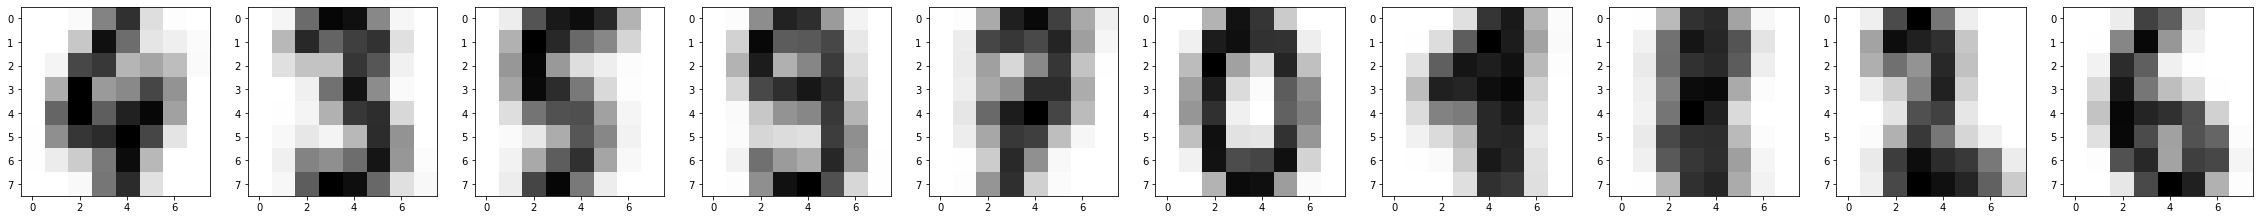

In [40]:
plt.figure(figsize=(40, 7))

plt_index = 1
for i in range(len(cluster_centers)):
    plt.subplot(1,10,plt_index)
    plt.imshow(cluster_centers[i].reshape(8,8), interpolation='nearest', cmap=plt.cm.binary)
    plt_index += 1

### clustering in Spark

* The MLlib implementation includes a parallelized variant of the k-means++ method called kmeans||.
* The MLlib structure and syntax seems familiar if you already know `sklearn`

```python
from pyspark.ml.clustering import KMeans
...
KMeans().setK(2) 
...
labels  = model.transform(data)

```


[Clustering Algorithms in Spark](https://spark.apache.org/docs/latest/mllib-clustering.html)

In [ ]:
### The following code needs to be executed 
### from a spark environment (ex. spark docker instance share in class)

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Loads data.
dataset = spark.read.format("libsvm").load("data/mllib/sample_kmeans_data.txt")

# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)



In [3]:
### The following code needs to be executed 
### from a spark environment (ex. spark docker instance share in class)


# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette_score = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette_score))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)